# Creating a simple forecasting model
The Mosqlient library already includes a simple forecasting model for demonstrative purposes based on an ARIMA model.

In [20]:
from mosqlient.models.baseline import Arima

In [21]:
m_arima = Arima(geocode = 3304557, disease = 'dengue')
m_arima

In [22]:
model = m_arima.train( train_ini_date='2010-01-01', train_end_date = '2021-12-31')
model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-291.303, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-263.031, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-297.620, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-289.702, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-264.935, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-302.773, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-301.987, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-308.875, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-301.181, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-306.876, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-305.545, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-306.272, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-310.782, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-303.034, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]          

ARIMA(maxiter=100, order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## Making in-sample predictions

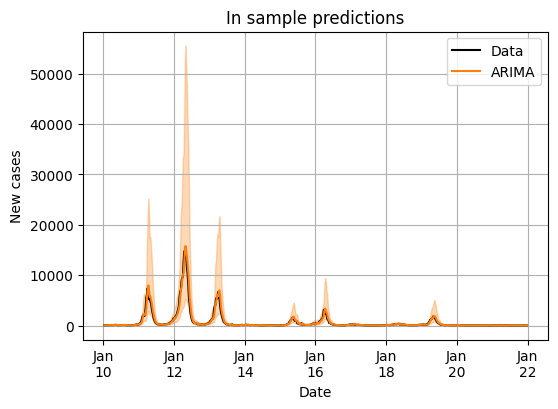

In [23]:
df_in_sample = m_arima.predict_in_sample(plot = True)

In [24]:
df_in_sample.head()

,date,preds,lower,upper,data
1,2010-01-10,29.999999,17.195254,54.460467,44.0
2,2010-01-17,40.109520,22.919129,73.070578,46.0
3,2010-01-24,47.548664,26.956058,87.413940,47.0
4,2010-01-31,48.534824,27.525451,89.188386,68.0
5,2010-02-07,64.439927,35.896455,120.890029,56.0


## Now for forecasting

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-217.015, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-171.354, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-200.885, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-193.904, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-173.145, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-206.495, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-218.871, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-208.031, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-209.514, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-216.921, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-207.908, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-217.491, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-220.704, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-209.762, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]          

,date,preds,lower,upper,adm_2
0,2024-01-07,2144.871726,976.451102,5006.947214,3304557
1,2024-01-14,2434.730194,889.521646,7378.615106,3304557
2,2024-01-21,2532.142009,729.246237,10313.121505,3304557
3,2024-01-28,2677.911285,625.212116,14332.847649,3304557


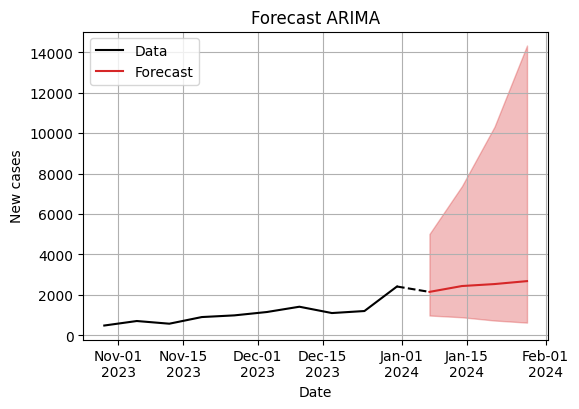

In [15]:
model = m_arima.train( train_ini_date='2010-01-01', train_end_date = '2023-12-31')
df_for = m_arima.forecast(horizon = 4, plot = True, last_obs = 10)
df_for.head()

## Uploading the forecasts to the Mosqlimate platform
Before you can upload the forecast, you need to register your model on the platform for this you should follow [these instructions](https://api.mosqlimate.org/docs/registry/POST/models/).

Then, you need to format the output of you model as a JSON object. This object will look like this:

```JSON
{
    "model": model_id,
    "description": description,
    "commit": commit,
    "predict_date": predict_date,
    "prediction": predict
}
```

In [16]:
import json

Before uploading the predictions we need to convert the output dataframe into a JSON object as well.

In [19]:
predictions = df_for.to_json(orient='records')
predictions

'[{"date":1704585600000,"preds":2144.8717258852,"lower":976.4511017665,"upper":5006.947214353,"adm_2":3304557},{"date":1705190400000,"preds":2434.7301939337,"lower":889.5216461968,"upper":7378.6151055803,"adm_2":3304557},{"date":1705795200000,"preds":2532.1420089588,"lower":729.2462366352,"upper":10313.121505054,"adm_2":3304557},{"date":1706400000000,"preds":2677.91128498,"lower":625.2121155553,"upper":14332.8476487148,"adm_2":3304557}]'

In [ ]:
pred_JSON = {
    "model": 1, #replace this with the Id you got after registering your model
    "description": "My ARIMA model's prediction is awesome is Awesome!", #add an informative text about this prediction in particular 
    "commit": "d2db351c79f17785dfa01c87883ffa1b6f67888b", # The Git commit id corresponding to the version of the code used to make this prediction. You can obtain this with the `git log` command 
    "predict_date": "2024-06-13",
    "prediction": predictions
}